<a href="https://colab.research.google.com/github/sergio1alanis/AnalisisDeImagenes/blob/main/AnalisisDeImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

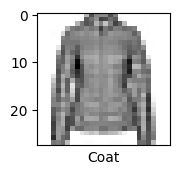

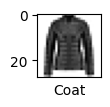

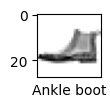

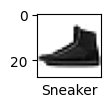

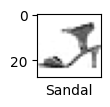

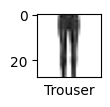

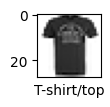

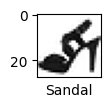

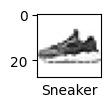

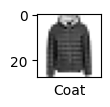

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.5072 - accuracy: 0.8202
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3482 - accuracy: 0.8710
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3219 - accuracy: 0.8810
Epoch 5/5
1/1 [==============================] - 0s 108ms/step


In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
datos, base_de_datos = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
datos_de_entrenamiento, datos_de_pruebas = datos['train'], datos['test']
nombres_de_las_clases = base_de_datos.features['label'].names

#Normalizar los datos

def normalizar_imagenes(imagenes,etiquetas):
  imagenes=tf.cast(imagenes, tf.float32)
  imagenes/=255
  return imagenes, etiquetas

#normalizar los datos de entrenamiento y pruebas
datos_de_entrenamiento = datos_de_entrenamiento.map(normalizar_imagenes)
datos_de_pruebas = datos_de_pruebas.map(normalizar_imagenes)

#Guardar en memoria cache
datos_de_entrenamiento = datos_de_entrenamiento.cache()
datos_de_pruebas = datos_de_pruebas.cache()


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))


for i,(imagen, etiqueta) in enumerate(datos_de_pruebas.take(10)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(imagen, cmap = plt.cm.binary)
  plt.xlabel(nombres_de_las_clases[etiqueta])
  plt.show()

  # Funciones para Definir las imgenes de entrada
red_neuronal = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(60,activation=tf.nn.relu),
    tf.keras.layers.Dense(60,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])

#Optimizar la red

red_neuronal.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#Crear un lote con las funiones  repeat y shuffle

TAMANO_DEL_LOTE = 32

datos_de_entrenamiento = datos_de_entrenamiento.repeat().shuffle(60000).batch(TAMANO_DEL_LOTE)
datos_de_pruebas = datos_de_pruebas.batch(TAMANO_DEL_LOTE)


#ENTRENAR LA RED CON LA FUNCION PER CON 5 EPOCH

import math

entrenamiento = red_neuronal.fit(datos_de_entrenamiento,
                                 epochs=5, steps_per_epoch=math.ceil(60000/TAMANO_DEL_LOTE))


import numpy as np

for imagenes_de_prueba, etiquetas_de_prueba in datos_de_pruebas.take(1):
  imagenes_de_prueba = imagenes_de_prueba
  etiquetas_de_prueba = etiquetas_de_prueba.numpy()
  predicciones = red_neuronal.predict(imagenes_de_prueba)


imagen = imagenes_de_prueba[6]
imagen = np.array([imagen])
prediccion = red_neuronal.predict(imagen)

